In [94]:
import pandas as pd
# permite que una misma celda imprima varios resultados
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 20000)
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
abortion = pd.read_csv('/content/drive/My Drive/Tweeter/Datasets/abortion_tweets.csv', engine='python')

In [ ]:
#abortion = pd.read_csv("abortion_tweets.csv")

In [97]:
print(len(abortion))
print(len(abortion["tweet.full_text"].unique()))

613550
95887


# Cobertura

In [98]:
print(len(abortion["tweet.full_text"]))
print(len(abortion["tweet.full_text"].dropna()))

613550
318860


#### 1era cobertura

In [99]:
def get_text(tweet):
    if tweet["tweet.retweeted_status.text"] == tweet["tweet.retweeted_status.text"]:
        return tweet["tweet.retweeted_status.text"]
    else:
        return tweet["tweet.full_text"]

In [100]:
abortion["full_text"] = abortion.apply(get_text, axis=1)

In [101]:
print(len(abortion["tweet.full_text"]))
print(len(abortion["full_text"].dropna()))

613550
535492


Veamos los tweets que aún nos aparecen como NaN en la columna full_text para ver a dónde podemos encontrar el texto de ese tweet:

In [102]:
abortion_filt1 = abortion[abortion['full_text'].isnull()]
abortion_filt1.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text
208,ObjectId(5dc083fde36ea093ac65d2c3),streaming,Mon Nov 04 20:03:04 +0000 2019,1191445778847416321,NaN,@SpeakerPelosi Speaking of betraying your oath...all abortion supporters betray their as do all promoters of gun re… https://t.co/vpdz0NzJA0,@SpeakerPelosi Speaking of betraying your oath...all abortion supporters betray their as do all promoters of gun restrictions! Nancy's and all democrats have betrayed her oath for decades! You working for the people? Who believes this sh*t?! RT #forthepeople,"[15,140]","{""hashtags"":[],""urls"":[{""url"":""https://t.co/vpdz0NzJA0"",""expanded_url"":""https://twitter.com/i/web/status/1191445778847416321"",""display_url"":""twitter.com/i/web/status/1…"",""indices"":[117,140]}],""user_mentions"":[{""screen_name"":""SpeakerPelosi"",""name"":""Nancy Pelosi"",""id"":15764644,""id_str"":""15764644"",""indices"":[0,14]}],""symbols"":[]}",322376763,Guisseppi,guisseppi2,San Diego,False,55,362,3,NaN,7046,Thu Jun 23 02:30:38 +0000 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,ObjectId(5dc08406e36ea093ac65d5f1),streaming,Mon Nov 04 20:03:12 +0000 2019,1191445814926643200,NaN,@Redlipsandquips Your forget transgender women with uteruses! What about if they need to get an abortion?? I hope y… https://t.co/9uskCQLu6w,@Redlipsandquips Your forget transgender women with uteruses! What about if they need to get an abortion?? I hope you support that. #homosexualsforautism,"[17,140]","{""hashtags"":[],""urls"":[{""url"":""https://t.co/9uskCQLu6w"",""expanded_url"":""https://twitter.com/i/web/status/1191445814926643200"",""display_url"":""twitter.com/i/web/status/1…"",""indices"":[117,140]}],""user_mentions"":[{""screen_name"":""Redlipsandquips"",""name"":""whore 4 gore"",""id"":{""$numberLong"":""1079796427285499905""},""id_str"":""1079796427285499905"",""indices"":[0,16]}],""symbols"":[]}",1191434909371387904,TheAutisticFeminist,TheAutisticFem,"Sunnyside, Calgary",False,0,0,0,NaN,12,Mon Nov 04 19:20:02 +0000 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,ObjectId(5dc08408e36ea093ac65d65b),streaming,Mon Nov 04 20:03:15 +0000 2019,1191445825848664064,NaN,"yea, @jack and @TwitterSupport ?",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""jack"",""name"":""jack 🌍🌏🌎"",""id"":12,""id_str"":""12"",""indices"":[5,10]},{""screen_name"":""TwitterSupport"",""name"":""Twitter Support"",""id"":17874544,""id_str"":""17874544"",""indices"":[15,30]}],""symbols"":[]}",1022590100524294144,Shirley Diaz,Shirley47749323,NaN,False,2,40,0,NaN,47,Thu Jul 26 21:10:53 +0000 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,ObjectId(5dc08423e36ea093ac65dd7f),streaming,Mon Nov 04 20:03:42 +0000 2019,1191445940147802112,NaN,@PPFA Time to shut down all federal government funding t

Si bien hay muchos que tienen NaN en la columna tweet.extended_tweet.full_text, nos conviene primero combinar full_text con esta para que no nos queden los tweets cortados

#### 2da cobertura

In [ ]:
# import json
# import numpy
# def get_text(tweet):
#     if tweet["tweet.retweeted_status.text"] == tweet["tweet.retweeted_status.text"]:
#         return tweet["tweet.retweeted_status.text"]
#     else:
#         if tweet["tweet.extended_tweet.full_text"] == tweet["tweet.extended_tweet.full_text"]:
#             return tweet["tweet.extended_tweet.full_text"]
#         else:
#             if tweet["tweet.text"] == tweet["tweet.text"]:
#                 return tweet["tweet.text"]
#             else:
#                 return tweet["tweet.full_text"]

In [103]:
def get_text2(tweet):
    if tweet["tweet.extended_tweet.full_text"] == tweet["tweet.extended_tweet.full_text"]:  
        return tweet["tweet.extended_tweet.full_text"]
    else:
        return tweet["full_text"]

Nota: Voy a ir agregando una nueva columna por cada una de estas funcioncitas para ir viendo que vaya todo bien, después dejamos una sola

In [104]:
abortion["full_text2"] = abortion.apply(get_text2, axis=1)

In [105]:
print(len(abortion["tweet.full_text"]))
print(len(abortion["full_text2"].dropna()))

613550
578442


Veamos de vuelta los tweets que aún no tienen el texto en full_text2

In [106]:
abortion_filt2 = abortion[abortion['full_text2'].isnull()]
abortion_filt2.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2
350,ObjectId(5dc08408e36ea093ac65d65b),streaming,Mon Nov 04 20:03:15 +0000 2019,1191445825848664064,NaN,"yea, @jack and @TwitterSupport ?",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""jack"",""name"":""jack 🌍🌏🌎"",""id"":12,""id_str"":""12"",""indices"":[5,10]},{""screen_name"":""TwitterSupport"",""name"":""Twitter Support"",""id"":17874544,""id_str"":""17874544"",""indices"":[15,30]}],""symbols"":[]}",1022590100524294144,Shirley Diaz,Shirley47749323,NaN,False,2,40,0,NaN,47,Thu Jul 26 21:10:53 +0000 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,ObjectId(5dc08423e36ea093ac65dd7f),streaming,Mon Nov 04 20:03:42 +0000 2019,1191445940147802112,NaN,@PPFA Time to shut down all federal government funding to Planned Parenthood permanently.,NaN,"[6,89]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""PPFA"",""name"":""Planned Parenthood"",""id"":402957663,""id_str"":""402957663"",""indices"":[0,5]}],""symbols"":[]}",1176634669795872768,Arthur Childs,ArthurChilds10,NaN,False,35,7,0,NaN,3730,Tue Sep 24 23:09:14 +0000 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,ObjectId(5dc08432e36ea093ac65dda7),streaming,Mon Nov 04 20:03:56 +0000 2019,1191445998008074240,NaN,Sexy Planned Parenthood near me,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",2798251111,sel,sleepylilsel,NaN,False,460,281,7,NaN,27785,Mon Sep 08 16:31:43 +0000 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,ObjectId(5dc08433e36ea093ac65dda9),streaming,Mon Nov 04 20:03:57 +0000 2019,1191446003204804608,NaN,i saw this on a paper at the planned parenthood office lol,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",2768637555,toxic bitch,ayleaaann,la chingada,False,557,264,0,NaN,50363,Sat Sep 13 07:35:43 +0000 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,ObjectId(5dc08434e36ea093ac65ddad),streaming,Mon Nov 04 20:03:59 +0000 2019,1191446009953566722,NaN,@okcupid I'll repeat until I'm blue in the face. Women have reproductive rights. They have the right to reproduce or not reproduce.,NaN,"[9,131]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""okcupid"",""name"":""OkCupid"",""id"":53543144,""id_str"":""53543144"",""indices"":[0,8]}],""symbols"":[]}",1165579850339573760,Matthew Vainauskas,MatthewVainaus3,NaN,False,527,580,1,NaN,10332,Sun Aug 25 11:01:50 +0000 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Y ahora sí combinamos con tweet_text:

#### 3era cobertura

In [107]:
abortion["full_text2"] = abortion["full_text2"].fillna(0)
abortion['category'] = np.where(abortion.full_text2 == 0 , 0, 1)
abortion['full_text2'] = np.where(abortion['category'] == 0, abortion['tweet.text'], abortion['full_text2'])

In [108]:
print(len(abortion["tweet.full_text"]))
print(len(abortion["full_text2"].dropna()))

613550
613550


Acá hay un ejemplo de tweet que no está completo

In [109]:
abortion.iloc[[613547]]

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2,category
613547,ObjectId(5dcdb6c0ee0a4baf1b072002),streaming,Thu Nov 14 20:19:07 +0000 2019,1195073696911609856,NaN,"RT @ilyseh: ....Aaaaannnnnddd, Matt Bevin concedes. Kentucky officially has a pro-choice governor. Thank you @AndyBeshearKY for trust the w…",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""ilyseh"",""name"":""ilyse hogue"",""id"":7860902,""id_str"":""7860902"",""indices"":[3,10]},{""screen_name"":""AndyBeshearKY"",""name"":""Andy Beshear"",""id"":{""$numberLong"":""2991360032""},""id_str"":""2991360032"",""indices"":[109,123]}],""symbols"":[]}",2242671698,Jody Schramm,JodySchramm,NaN,False,55,102,0,NaN,27735,Thu Dec 12 17:17:35 +0000 2013,NaN,NaN,Thu Nov 14 19:52:23 +0000 2019,1.195067e+18,"....Aaaaannnnnddd, Matt Bevin concedes. Kentucky officially has a pro-choice governor. Thank you @AndyBeshearKY for… https://t.co/bBStlCo5fh",7860902.0,ilyse hogue,ilyseh,"Washington, DC",True,50217.0,6117.0,982.0,NaN,27509.0,Tue Jul 31 22:38:48 +0000 2007,7860902.0,NaN,NaN,"{""full_text"":""....Aaaaannnnnddd, Matt Bevin concedes. Kentucky officially has a pro-choice governor. Thank you @AndyBeshearKY for trust the women and families in KY to make their own decisions about their own lives without political interference. #KYGov"",""display_text_range"":[0,241],""entities"":{""hashtags"":[{""text"":""KYGov"",""indices"":[235,241]}],""urls"":[],""user_mentions"":[{""screen_name"":""AndyBeshearKY"",""name"":""Andy Beshear"",""id"":{""$numberLong"":""2991360032""},""id_str"":""2991360032"",""indices"":[97,111]}],""symbols"":[]}}","....Aaaaannnnnddd, Matt Bevin concedes. Kentucky officially has a pro-choice governor. Thank you @AndyBeshearKY for… https://t.co/bBStlCo5fh","....Aaaaannnnnddd, Matt Bevin concedes. Kentucky officially has a pro-choice governor. Thank you @AndyBeshearKY for… https://t.co/bBStlCo5fh",1


# Grafo

Nos quedamos con los tweets que son retweets

In [110]:
retweets = abortion.dropna(subset=["tweet.retweeted_status.user.id_str"]) #Subset lo que hace es me elimina la fila si el nan está en la columna que le paso como parámetro
len(retweets["tweet.retweeted_status.user.id_str"])

462991

Código para armar el grafo:

In [111]:
full_g = nx.Graph()
vertex_ids = set()


for user1, user2 in zip(retweets["tweet.user.id_str"], retweets["tweet.retweeted_status.user.id_str"]):
    full_g.add_edge(user1, user2)

Estadística del grafo:

In [112]:
n = len(full_g.nodes)
m = len(full_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))

Nodos: 235367
Ejes: 399417


Gráfico de nodos de acuerdo a su grado:

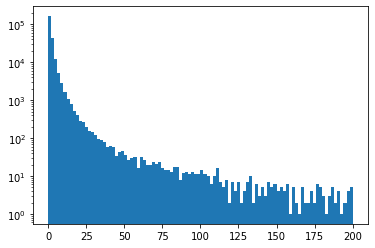

In [113]:
degrees = np.array([full_g.degree(node) for node in full_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=100);
plt.semilogy();

Recortamos el grafo para quedarnos con los nodos "influencers":

In [114]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [115]:
g = subgraph_strong_nodes(full_g, 5)

print("Nos quedan {:.2f}M nodos (antes eran {:.2f}M)".format(
    len(g.nodes) / 1e6,
    len(full_g.nodes) / 1e6
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 0.02M nodos (antes eran 0.24M)
Componentes conexas = 909


Cantidad de usuarios en las componentes conexas

In [116]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} usuarios".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} usuarios".format(sum(resto)))


Componentes conexas = 909
Componente 0  --> 18922  usuarios
Restantes     --> 983    usuarios


Nos quedamos solo con la componente más significativa:

In [117]:
g = g.subgraph(components[0])

### Ejercicio 5

In [118]:
def tienenMasDeNEnComun(tweet1, tweet2, n):
    t1 = set(tweet1.split(" "))
    t2 = set(tweet2.split(" "))
    return len(t1.intersection(t2)) > n

In [119]:
tienenMasDeNEnComun("Juanita tiene un lorito que se llama Pepito", "Pepito es un lorito que tiene plumas", 4)

True

In [120]:
print(len(abortion))
print(len(abortion["full_text2"].unique()))

613550
189222


In [121]:
no_retweets = abortion[abortion["tweet.retweeted_status.user.id_str"].isnull()]
no_retweets.shape
no_retweets.head()

(150559, 43)

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2,category
3,ObjectId(5dc083fbe36ea093ac65d1c6),abortion,Mon Nov 04 20:01:47 +0000 2019,1191445455286222852,Writing an essay on what philosophers have to say about abortion. Why,NaN,NaN,"[0,69]","{""hashtags"":[],""symbols"":[],""user_mentions"":[],""urls"":[]}",477959459,iris😎,lrisistible,:),False,447,233,4,NaN,41146,Sun Jan 29 19:09:21 +0000 2012,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Writing an essay on what philosophers have to say about abortion. Why,Writing an essay on what philosophers have to say about abortion. Why,1
4,ObjectId(5dc083fbe36ea093ac65d1c8),abortion,Mon Nov 04 20:01:46 +0000 2019,1191445453373628416,"@rn_gal @OpalescentMoon @realDonaldTrump Killing a baby after birth is already against the law. \nIf you are talking about abortion , There are people in democrats who totally oppose abortion. There republicans who totally support abortion. \nAbortion should not be a deciding factor for the country’s security and dignity",NaN,NaN,"[41,321]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""rn_gal"",""name"":""GalRN"",""id"":{""$numberLong"":""1006915339706396672""},""id_str"":""1006915339706396672"",""indices"":[0,7]},{""screen_name"":""OpalescentMoon"",""name"":""Dems: Eating Themselves Alive ❤️Trump🇺🇸2020🦁"",""id"":116370038,""id_str"":""116370038"",""indices"":[8,23]},{""screen_name"":""realDonaldTrump"",""name"":""Donald J. Trump"",""id"":25073877,""id_str"":""25073877"",""indices"":[24,40]}],""urls"":[]}",1030972456620711936,Sheila Thomas,SThomas42883812,"New York, USA",False,978,1573,0,NaN,1644,Sun Aug 19 00:19:22 +0000 2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@rn_gal @OpalescentMoon @realDonaldTrump Killing a baby after birth is already against the law. \nIf you are talking about abortion , There are people in democrats who totally oppose abortion. There republicans who totally support abortion. \nAbortion should not be a deciding factor for the country’s security and dignity","@rn_gal @OpalescentMoon @realDonaldTrump Killing a baby after birth is already against the law. \nIf you are talking about abortion , There are people in democrats who totally oppose abortion. There republicans who totally support abortion. \nAbortion should not be a deciding factor for the country’s security and dignity",1
9,ObjectId(5dc083fbe36ea093ac65d1d2),abortion,Mon Nov 04 20:01:35 +0000 2019,1191445406388899840,Pro-life people on abortion: all life is innocent and MURDER IS WRONG!!!\n*Rodney Reed is about to be executed for a crime he did not commit*\nPro-life people:,NaN,NaN,"[0,157]","{""hashtags"":[],""symbols"":[],""user_mentions"":[],""urls"":[]}",866805905760899073,Caitlin Butcher,caitybutcher,NaN,False,464,636,2,NaN,2244,Tue May 23 00:00:07 +0000 2017,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#Codigo original, se duplican las comparaciones entre los tweets
tweet_g = nx.Graph()
vertex_ids = set()
result = []

for tweet1 in no_retweets["full_text2"][:1000]:
    for tweet2 in no_retweets["full_text2"][:1000]:
      if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
        #Se agrego este result.append para revisar cuantas comparaciones se estan realizando.
        result.append(str(tweet1)+","+str(tweet2))
        tweet_g.add_edge(tweet1,tweet2)   

n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))
print("Total de iteraciones resultado funcion actual: "+str(len(result)))  

Nodos: 170
Ejes: 372
Total de iteraciones resultado funcion actual: 764


In [ ]:
#Codigo un poco mas eficiente. No repite las comparaciones de tweets.
tweet_g = nx.Graph()
vertex_ids = set()

#Variable auxiliar para ver cuantas comparaciones se estan haciendo al final del ultimo if
result = []

#Indice para tweet1
i = 0

#Indice para tweet2
j = 0

for tweet1 in no_retweets["full_text2"][:1000]:
  i+= 1
  j = 0
  for tweet2 in no_retweets["full_text2"][:1000]:
    j+= 1
    if i != j and i < j :
        if(tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
          result.append(str(tweet1)+","+str(tweet2))
          tweet_g.add_edge(tweet1,tweet2)   

n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))         
print("Total de iteraciones resultado funcion mejorada: "+str(len(result)))


Nodos: 170
Ejes: 372
Total de iteraciones resultado funcion mejorada: 382


Podemos observar que tanto la funcion mejorada como el código original, dan el mismo resultado de grafos. Sin embargo el segundo bloque es más eficiente, ya que realiza la mitad de comparaciones lógicas para obtener los resultados. Entiendo que al armar los nodos, si los mismos estan repetidos, en realidad se estan sobreescribiendo, por lo cual el resultado no se modifica.

La cantidad de ejes deberia ser la misma que la cantidad de iteraciones?? En este ejemplo tenemos 10 iteraciones mas que ejes. En realidad son 10 ejes repetidos por lo que se sobreescriben.


#### Comenzamos a generar un nuevo Grafo con mayor cantidad de Tweets para obtener mejores resultados

In [130]:
# Mismo codigo anterior con identico resultado, solo que se utilizan de forma diferente los incrementales en la iteracion
import networkx as nx

tweet_g = nx.Graph()
vertex_ids = set()

i=0
j=0
for tweet1 in no_retweets["full_text2"][:10000]:
    for tweet2 in no_retweets["full_text2"][i:10000]:
        if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
            tweet_g.add_edge(tweet1,tweet2)  
            j+=1
    i+=1


n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))
print("Total de iteraciones resultado funcion mejorada: "+str(j))

Nodos: 3233
Ejes: 18360
Total de iteraciones resultado funcion mejorada: 19372


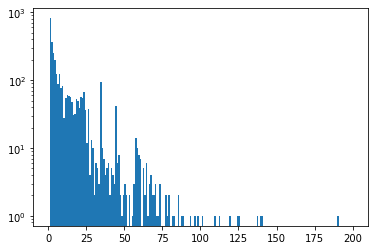

In [131]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

degrees = np.array([tweet_g.degree(node) for node in tweet_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=200);
plt.semilogy();

De acuerdo al grafico anterior, observamos que tenemos casi 1000 tweets con tan solo una arista, y que tenemos 1 solo tweet con mas de 180 aristas.

Recortamos el Grafo, quitando los nodos con menos de 3 aristas.

In [151]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [155]:
g = subgraph_strong_nodes(tweet_g, 3)

print("Nos quedan {:.2f} nodos (antes eran {:.2f})".format(
    len(g.nodes),
    len(tweet_g.nodes)
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 2061.00 nodos (antes eran 3233.00)
Componentes conexas = 76


In [157]:
print(nx.number_connected_components(g))

76


In [154]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} tweets".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} tweets".format(sum(resto)))

Componentes conexas = 76
Componente 0  --> 1240   tweets
Restantes     --> 821    tweets


In [149]:
g = g.subgraph(components[0])

In [ ]:
# nx.write_gexf(g, "aborto.gexf")

Obtenemos 76 componentes conexas, cuya componente 0 tiene 1240 tweets.

# EDA

In [ ]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
no_retweets = abortion[abortion["tweet.retweeted_status.user.id_str"].isnull()]

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):  # Función para normalizar
    only_letters = re.sub("[^a-zA-Z]", " ", tweet) # Elimina todo lo que no sea letra
    lower_case = only_letters.lower() # Lleva todo a minúscula
    filtered_result = [word for word in word_tokenize(lower_case) if not word in stopwords.words()] # Elimina las stopwords
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] # Elimina plurales
    return lemmas

In [ ]:
no_retweets_filt = no_retweets.head(10) #agarro los primeros 10 nomás para que termine rápido

In [ ]:

no_retweets_filt['texto_normalizado'] = no_retweets_filt['full_text2'].apply(normalizer)

In [ ]:
no_retweets_filt[['full_text2','texto_normalizado']].head()

,full_text2,texto_normalizado
3,Writing an essay on what philosophers have to say about abortion. Why,"[writing, essay, philosopher, say, abortion]"
4,"@rn_gal @OpalescentMoon @realDonaldTrump Killing a baby after birth is already against the law. \nIf you are talking about abortion , There are people in democrats who totally oppose abortion. There republicans who totally support abortion. \nAbortion should not be a deciding factor for the country’s security and dignity","[rn, gal, opalescentmoon, realdonaldtrump, killing, baby, birth, already, law, talking, abortion, people, democrat, totally, oppose, abortion, republican, totally, support, abortion, abortion, deciding, factor, country, security, dignity]"
9,Pro-life people on abortion: all life is innocent and MURDER IS WRONG!!!\n*Rodney Reed is about to be executed for a crime he did not commit*\nPro-life people:,"[pro, life, people, abortion, life, innocent, murder, wrong, rodney, reed, executed, crime, commit, pro, life, people]"
18,@JimHawk67327371 @ewarren considers abortion a reproductive right. Can a woman reproduce without the deposits of a man? Whether he is present or not his deposit is needed. Odd they want ALL to get along while wishing HALF the population disappear. FYI the population they wish gone CONSERVATIVES,"[jimhawk, ewarren, considers, abortion, reproductive, right, woman, reproduce, without, deposit, whether, present, deposit, needed, odd, get, along, wishing, half, population, disappear, fyi, population, wish, gone, conservative]"
33,@liquidrouge Normally I don’t block people but when it comes to neo-nazi terrorists; I will make an exception. Such a failed abortion isn’t worth my time.,"[liquidrouge, normally, block, people, come, neo, nazi, terrorist, make, exception, failed, abortion, worth, time]"


In [ ]:
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
no_retweets_filt['grams'] = no_retweets_filt.texto_normalizado.apply(ngrams)
no_retweets_filt[['grams']].head()

,grams
3,"[writing essay, essay philosopher, philosopher say, say abortion, writing essay philosopher, essay philosopher say, philosopher say abortion]"
4,"[rn gal, gal opalescentmoon, opalescentmoon realdonaldtrump, realdonaldtrump killing, killing baby, baby birth, birth already, already law, law talking, talking abortion, abortion people, people democrat, democrat totally, totally oppose, oppose abortion, abortion republican, republican totally, totally support, support abortion, abortion abortion, abortion deciding, deciding factor, factor country, country security, security dignity, rn gal opalescentmoon, gal opalescentmoon realdonaldtrump, opalescentmoon realdonaldtrump killing, realdonaldtrump killing baby, killing baby birth, baby birth already, birth already law, already law talking, law talking abortion, talking abortion people, abortion people democrat, people democrat totally, democrat totally oppose, totally oppose abortion, oppose abortion republican, abortion republican totally, republican totally support, totally support abortion, support abortion abortion, abortion abortion deciding, abortion deciding factor, deciding factor country, factor country security, country security dignity]"
9,"[pro life, life people, people abortion, abortion life, life innocent, innocent murder, murder wrong, wrong rodney, rodney reed, reed executed, executed crime, crime commit, commit pro, pro life, life people, pro life people, life people abortion, people abortion life, abortion life innocent, life innocent murder, innocent murder wrong, murder wrong rodney, wrong rodney reed, rodney reed executed, reed executed crime, executed crime commit, crime commit pro, commit pro life, pro life people]"
18,"[jimhawk ewarren, ewarren considers, considers abortion, abortion reproductive, reproductive right, right woman, woman reproduce, reproduce without, without deposit, deposit whether, whether present, present deposit, deposit needed, needed odd, odd get, get along, along wishing, wishing half, half population, population disappear, disappear fyi, fyi population, population wish, wish gone, gone conservative, jimhawk ewarren considers, ewarren considers abortion, considers abortion reproductive, abortion reproductive right, reproductive right woman, right woman reproduce, woman reproduce without, reproduce without deposit, without deposit whether, deposit whether present, whether present deposit, present deposit needed, deposit needed odd, needed odd get, odd get along, get along wishing, along wishing half, wishing half population, half population disappear, population disappear fyi, disappear fyi population, fyi population wish, population wish gone, wish gone conservative]"
33,"[liquidrouge normally, normally block, block people, people come, come neo, neo nazi, nazi terrorist, terrorist make, make exception, exception failed, failed abortion, abortion worth, worth time, liquidrouge normally block, normally block people, block people come, people come neo, come neo nazi, neo nazi terrorist, nazi terrorist make, terrorist make exception, make exception failed, exception failed abortion, failed abortion worth, abortion worth time]"


In [ ]:
import collections

def count_words(input):
    cnt = collections.Counter()  # Counter nos permite contar la ocurrencia de un item en particular
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [ ]:
count = no_retweets_filt[['grams']].apply(count_words)['grams']

In [ ]:
common_words = no_retweets_filt[['grams']].apply(count_words)['grams'].most_common(20)
common_words

[('http co', 7),
 ('judicial watch', 4),
 ('ralph northam', 3),
 ('talking point', 3),
 ('pro life', 2),
 ('life people', 2),
 ('pro life people', 2),
 ('watch document', 2),
 ('document show', 2),
 ('show virginia', 2),
 ('virginia gov', 2),
 ('gov ralph', 2),
 ('northam took', 2),
 ('took abortion', 2),
 ('abortion talking', 2),
 ('planned parenthood', 2),
 ('judicial watch document', 2),
 ('watch document show', 2),
 ('document show virginia', 2),
 ('show virginia gov', 2)]

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'All Tweets Wordcount')

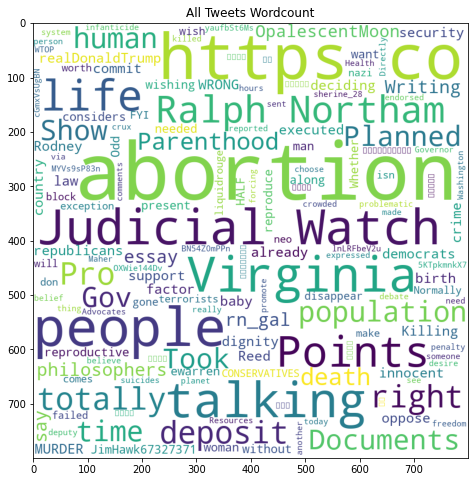

In [ ]:
from wordcloud import WordCloud,STOPWORDS
allcomments = " ".join(no_retweets_filt.full_text2)
wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = STOPWORDS,
                    min_font_size = 12).generate(allcomments)
     
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("All Tweets Wordcount")
plt.show()

#### ¿Qué pasa si hago directamente la segunda cobertura?

In [ ]:
abortion = pd.read_csv("abortion_tweets.csv")

In [ ]:
def get_text4(tweet):
    if tweet["tweet.extended_tweet.full_text"] == tweet["tweet.extended_tweet.full_text"]:  
        return tweet["tweet.extended_tweet.full_text"]
    else:
        return tweet["tweet.full_text"]

In [ ]:
abortion["full_text"] = abortion.apply(get_text4, axis=1)

In [ ]:
len(abortion["tweet.full_text"])
len(abortion["full_text"].dropna())

613550

361810

In [ ]:
abortion_filt4 = abortion[abortion['full_text'].isnull()]
abortion_filt4.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text
139,ObjectId(5dc08401e36ea093ac65d3f2),streaming,Mon Nov 04 20:03:06 +0000 2019,1191445786623537153,NaN,"RT @jchilleen: As if tech students don’t have enough mental health issues already, the GT admin really approved a pro-life group to put up…",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""jchilleen"",""name"":""ms leen"",""id"":358316150,""id_str"":""358316150"",""indices"":[3,13]}],""symbols"":[]}",907641484530372608,lil bean,agonydoo,"Georgia, USA",False,89,304,0,NaN,2435,Tue Sep 12 16:26:07 +0000 2017,NaN,NaN,Mon Nov 04 18:03:49 +0000 2019,1.191416e+18,"As if tech students don’t have enough mental health issues already, the GT admin really approved a pro-life group t… https://t.co/JNKYDXouA9",3.583162e+08,ms leen,jchilleen,"Atlanta, GA",False,666.0,604.0,1.0,NaN,3947.0,Fri Aug 19 18:39:59 +0000 2011,3.583162e+08,NaN,NaN,"{""full_text"":""As if tech students don’t have enough mental health issues already, the GT admin really approved a pro-life group to put up harmful \u0026amp; misinformative pictures/footage of aborted fetuses. So disturbing, esp to students who may have had abortions. @GeorgiaTech @CabreraAngel"",""display_text_range"":[0,275],""entities"":{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""GeorgiaTech"",""name"":""Georgia Tech"",""id"":19080617,""id_str"":""19080617"",""indices"":[249,261]},{""screen_name"":""CabreraAngel"",""name"":""Ángel Cabrera"",""id"":101621104,""id_str"":""101621104"",""indices"":[262,275]}],""symbols"":[]}}",NaN
140,ObjectId(5dc08402e36ea093ac65d3f4),streaming,Mon Nov 04 20:03:09 +0000 2019,1191445798610845696,NaN,RT @Amel1a_1: ANY MORON celebrating deaths of 50M+ BORN AND UNBORN BABIES is a demon in human skin (wished 'happy birthday' to planned pare…,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""Amel1a_1"",""name"":""Amelia 1 - 100% TRUMP"",""id"":{""$numberLong"":""1172541877842829313""},""id_str"":""1172541877842829313"",""indices"":[3,12]}],""symbols"":[]}",1045674388463337472,D’Harry Southwood,HarrySouthwood,"Los Angeles, CA",False,333,760,0,NaN,7572,Fri Sep 28 13:59:36 +0000 2018,NaN,NaN,Mon Nov 04 19:46:45 +0000 2019,1.191442e+18,ANY MORON celebrating deaths of 50M+ BORN AND UNBORN BABIES is a demon in human skin (wished 'happy birthday' to pl… https://t.co/69szD0eDHF,1.172542e+18,Amelia 1 - 100% TRUMP,Amel1a_1,"Huntsville, Texas",False,5086.0,5273.0,0.0,NaN,1204.0,Fri Sep 13 16:05:54 +0000 2019,1.172542e+18,NaN,NaN,"{""full_text"":""ANY MORON celebrating deaths of 50M+ BORN AND UNBORN BABIES is a demon in human skin (wished 'happy birthday' to planned parenthood)\nGod Judge these worthless sacks of Sh*t and send them to hell for eternity\n#Scumbags https://t.co/JePvQ9xhwn"",""display_text_range"":[0,217],""entities"":{""hashtags"":[{""text"":""Scumbags"",""indices"":[208,217]}],""urls"":[{""url"":""h